In [0]:
import numpy as np
import pandas as pd

In [0]:
iris = pd.read_csv("iris.csv")

In [0]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Processing

### Features and Target

In [0]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [0]:
X = iris.drop('species',axis=1)
y = iris['species']

In [0]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [0]:
scaler = MinMaxScaler()

In [0]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_X_train = scaler.transform(X_train)

In [0]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(patience=10)

In [0]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

## Model Evaluation

In [0]:
metrics = pd.DataFrame(model.history.history)

In [0]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.166834,0.316667,1.105122,0.400000
1,1.155035,0.316667,1.100573,0.400000
2,1.143857,0.316667,1.096682,0.400000
3,1.134787,0.316667,1.093410,0.400000
4,1.124523,0.316667,1.090720,0.400000
...,...,...,...,...
295,0.509522,0.825000,0.550541,0.866667
296,0.508843,0.816667,0.548908,0.866667
297,0.507457,0.816667,0.547864,0.866667
298,0.506503,0.816667,0.547053,0.866667


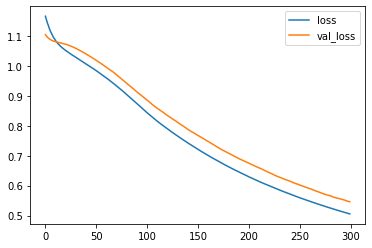

In [0]:
metrics[['loss','val_loss']].plot()

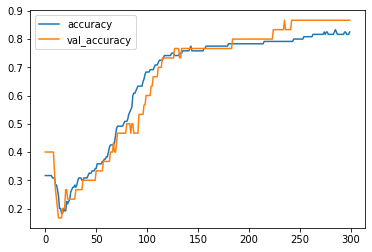

In [0]:
metrics[['accuracy','val_accuracy']].plot()

In [0]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.5459867119789124, 0.8666666746139526]

## Ready Model for Deployment

In [0]:
epochs = len(metrics)

In [0]:
scaled_X = scaler.fit_transform(X)

In [0]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer for multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(scaled_X,y,epochs=epochs)

In [0]:
model.save("final_iris_model.h5")

### Saving Scaler

In [0]:
import joblib

In [0]:
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Predicting a Single New Flower

In [0]:
from tensorflow.keras.models import load_model

In [0]:
flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")

In [0]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [0]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [0]:
flower_example.keys()

dict_keys(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [0]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]
                    

In [0]:
return_prediction(flower_model,flower_scaler,flower_example)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


'setosa'

# CODE FOR DEPLOYMENT:

In [0]:
from tensorflow.keras.models import load_model
import joblib


flower_model = load_model("final_iris_model.h5")
flower_scaler = joblib.load("iris_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_ind = model.predict_classes(flower)
    
    return classes[class_ind][0]

In [0]:
flower_example = {
"sepal_length":5.1,
"sepal_width":3.5,
"petal_length":1.4,
"petal_width":0.2
}